In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


<IPython.core.display.Javascript object>


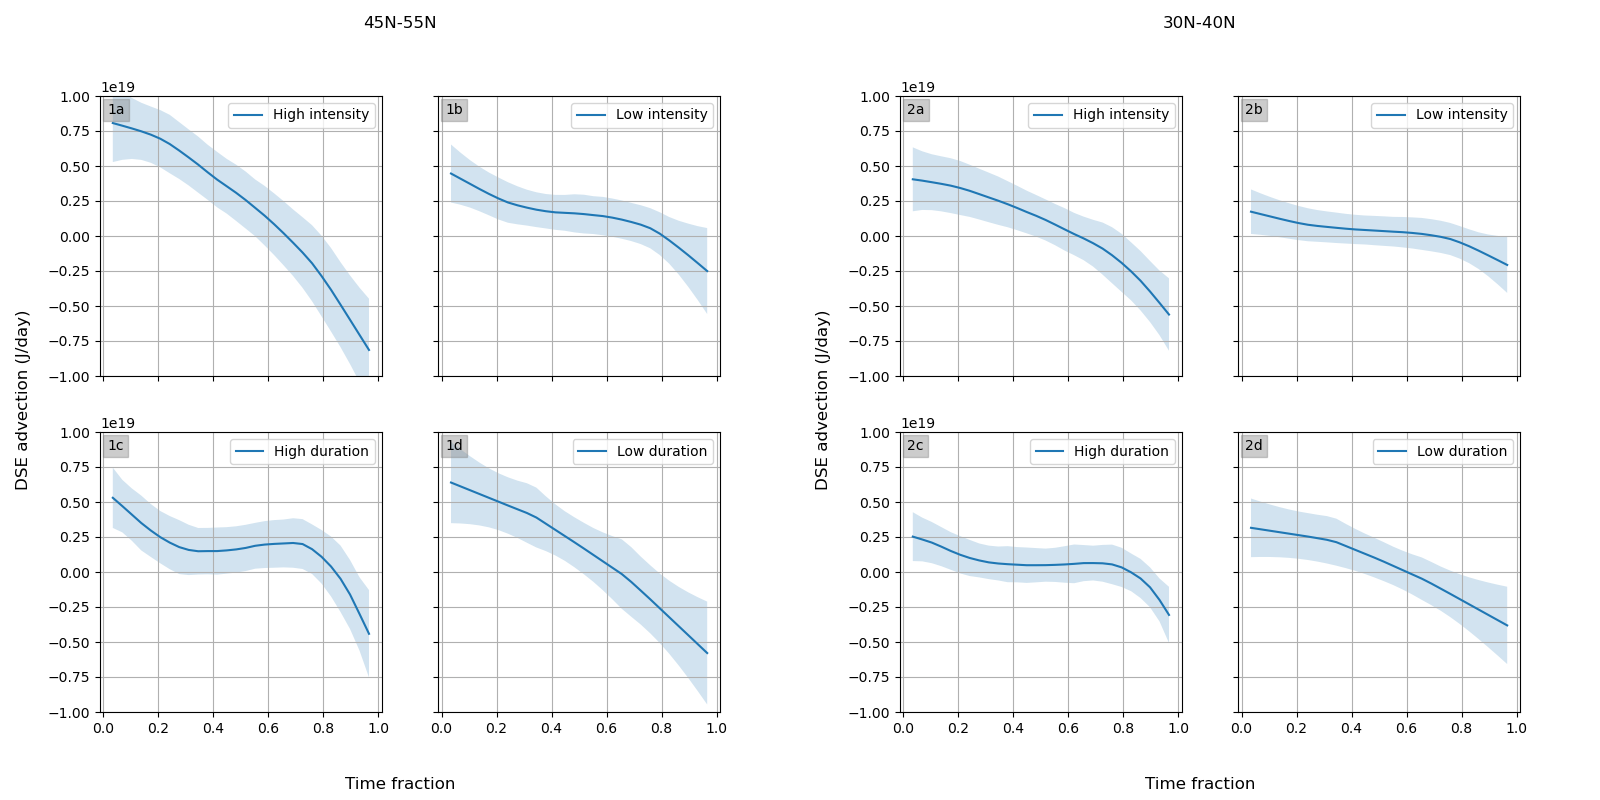

730.0000000000001


/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


730.0000000000001


/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/550310625.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


In [18]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convh,convv=pickle.load(f)


# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out


int_list=[]
dur_list=[]
ac_list=[]

for i in range(len(Rey[0])):

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    ac_tot=convh[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
#     ac_tot=convv[i][:,:7].sum(axis=1)+Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    
#     ac=(Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1))/ac_tot
#     ac=(Rey[2][i][:,:7].sum(axis=1))
    
#     ac[ac>1]=1
#     ac[ac<0]=0
    
    ac_list.append(ac_tot)
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='High intensity')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].legend()
ax[0][0].set_ylim([-1e19, 1e19])
ax[0][0].grid()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='Low intensity')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].legend()
ax[0][1].set_ylim([-1e19, 1e19])
ax[0][1].grid()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='High duration')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].legend()
ax[1][0].set_ylim([-1e19, 1e19])
ax[1][0].grid()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='Low duration')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].legend()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].grid()
set_label(subfigs[0], ax[1][1],'1d')

# fig.supxlabel('Time fraction')
# fig.supylabel('DSE advection (J/day)')
subfigs[0].suptitle('45N-55N')

#########################################################################################
#########################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convh,convv=pickle.load(f)


# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out


int_list=[]
dur_list=[]
ac_list=[]

for i in range(len(Rey[0])):

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    ac_tot=convh[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
#     ac_tot=convv[i][:,:7].sum(axis=1)+Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    
#     ac=(Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1))/ac_tot
#     ac=(Rey[2][i][:,:7].sum(axis=1))
    
#     ac[ac>1]=1
#     ac[ac<0]=0
    
    ac_list.append(ac_tot)
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='High intensity')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].legend()
ax[0][0].set_ylim([-1e19, 1e19])
ax[0][0].grid()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='Low intensity')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].legend()
ax[0][1].set_ylim([-1e19, 1e19])
ax[0][1].grid()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='High duration')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].legend()
ax[1][0].set_ylim([-1e19, 1e19])
ax[1][0].grid()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='Low duration')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].legend()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].grid()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[0].supxlabel('Time fraction')
subfigs[1].supxlabel('Time fraction')
subfigs[0].supylabel('DSE advection (J/day)')
subfigs[1].supylabel('DSE advection (J/day)')

subfigs[1].suptitle('30N-40N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig6d_comb.pdf', bbox_inches='tight')
# plt.savefig('/home/data/lab_abel/Paper1_plots/fig6d_comb.pdf')

<IPython.core.display.Javascript object>


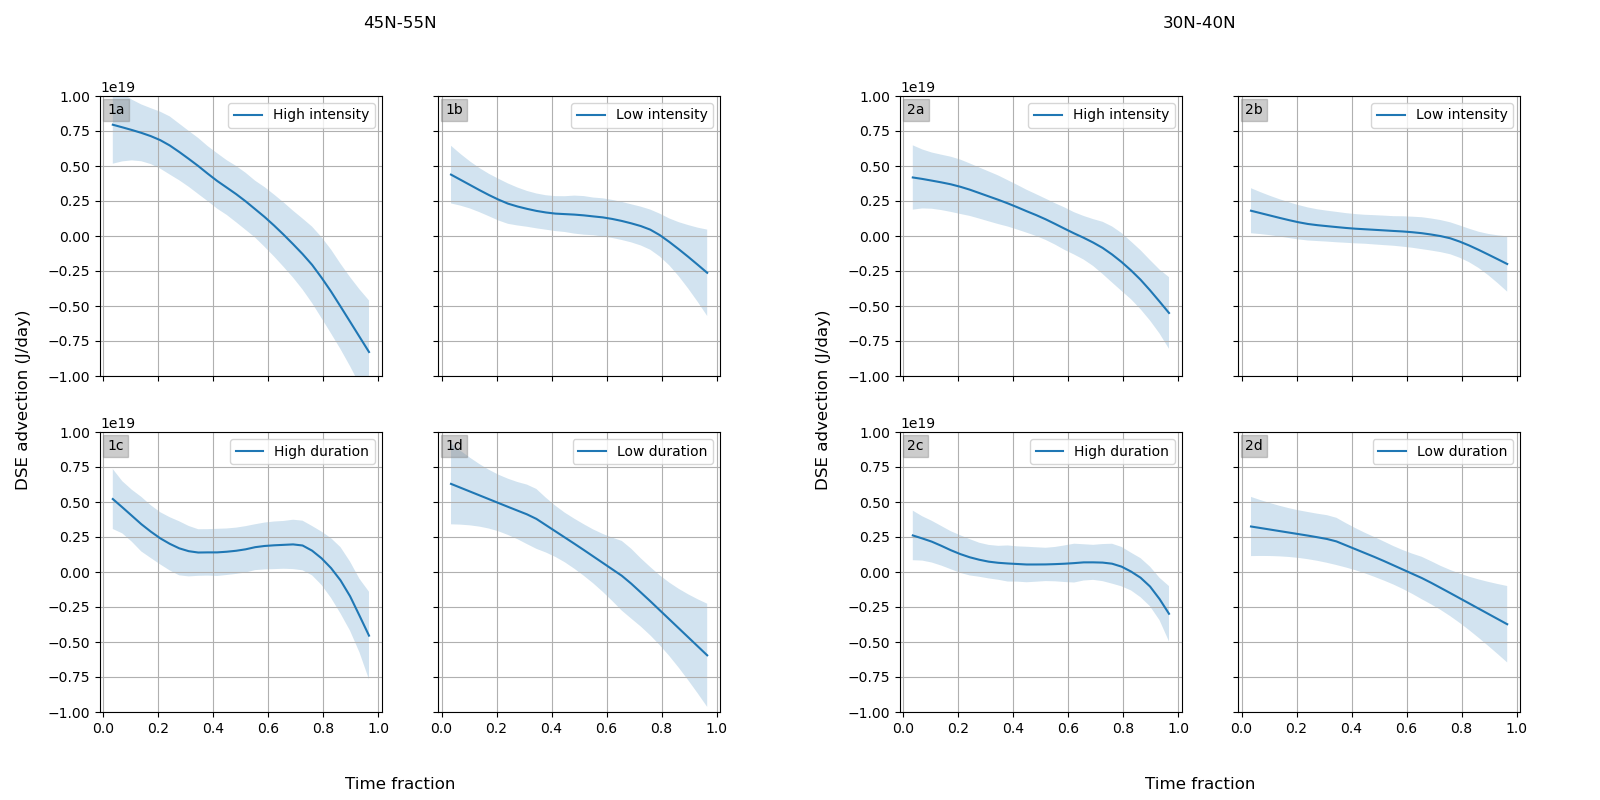

730.0000000000001


/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


730.0000000000001


/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1978346313.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


In [19]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convh,convv=pickle.load(f)


# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out


int_list=[]
dur_list=[]
ac_list=[]

for i in range(len(Rey[0])):

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
#     ac_tot=convh[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
    ac_tot=convv[i][:,:7].sum(axis=1)+Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    
#     ac=(Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1))/ac_tot
#     ac=(Rey[2][i][:,:7].sum(axis=1))
    
#     ac[ac>1]=1
#     ac[ac<0]=0
    
    ac_list.append(ac_tot)
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='High intensity')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].legend()
ax[0][0].set_ylim([-1e19, 1e19])
ax[0][0].grid()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='Low intensity')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].legend()
ax[0][1].set_ylim([-1e19, 1e19])
ax[0][1].grid()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='High duration')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].legend()
ax[1][0].set_ylim([-1e19, 1e19])
ax[1][0].grid()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='Low duration')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].legend()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].grid()
set_label(subfigs[0], ax[1][1],'1d')

# fig.supxlabel('Time fraction')
# fig.supylabel('DSE advection (J/day)')
subfigs[0].suptitle('45N-55N')

#########################################################################################
#########################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convh,convv=pickle.load(f)


# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out


int_list=[]
dur_list=[]
ac_list=[]

for i in range(len(Rey[0])):

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
#     ac_tot=convh[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
    ac_tot=convv[i][:,:7].sum(axis=1)+Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    
#     ac=(Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1))/ac_tot
#     ac=(Rey[2][i][:,:7].sum(axis=1))
    
#     ac[ac>1]=1
#     ac[ac<0]=0
    
    ac_list.append(ac_tot)
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='High intensity')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].legend()
ax[0][0].set_ylim([-1e19, 1e19])
ax[0][0].grid()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='Low intensity')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].legend()
ax[0][1].set_ylim([-1e19, 1e19])
ax[0][1].grid()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='High duration')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].legend()
ax[1][0].set_ylim([-1e19, 1e19])
ax[1][0].grid()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):

        xx.append(np.linspace(0,1,len(ac_list[i])))
        yy.append(ac_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='Low duration')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].legend()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].grid()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[0].supxlabel('Time fraction')
subfigs[1].supxlabel('Time fraction')
subfigs[0].supylabel('DSE advection (J/day)')
subfigs[1].supylabel('DSE advection (J/day)')

subfigs[1].suptitle('30N-40N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig6v_comb.pdf', bbox_inches='tight')
# plt.savefig('/home/data/lab_abel/Paper1_plots/fig6d_comb.pdf')

<IPython.core.display.Javascript object>


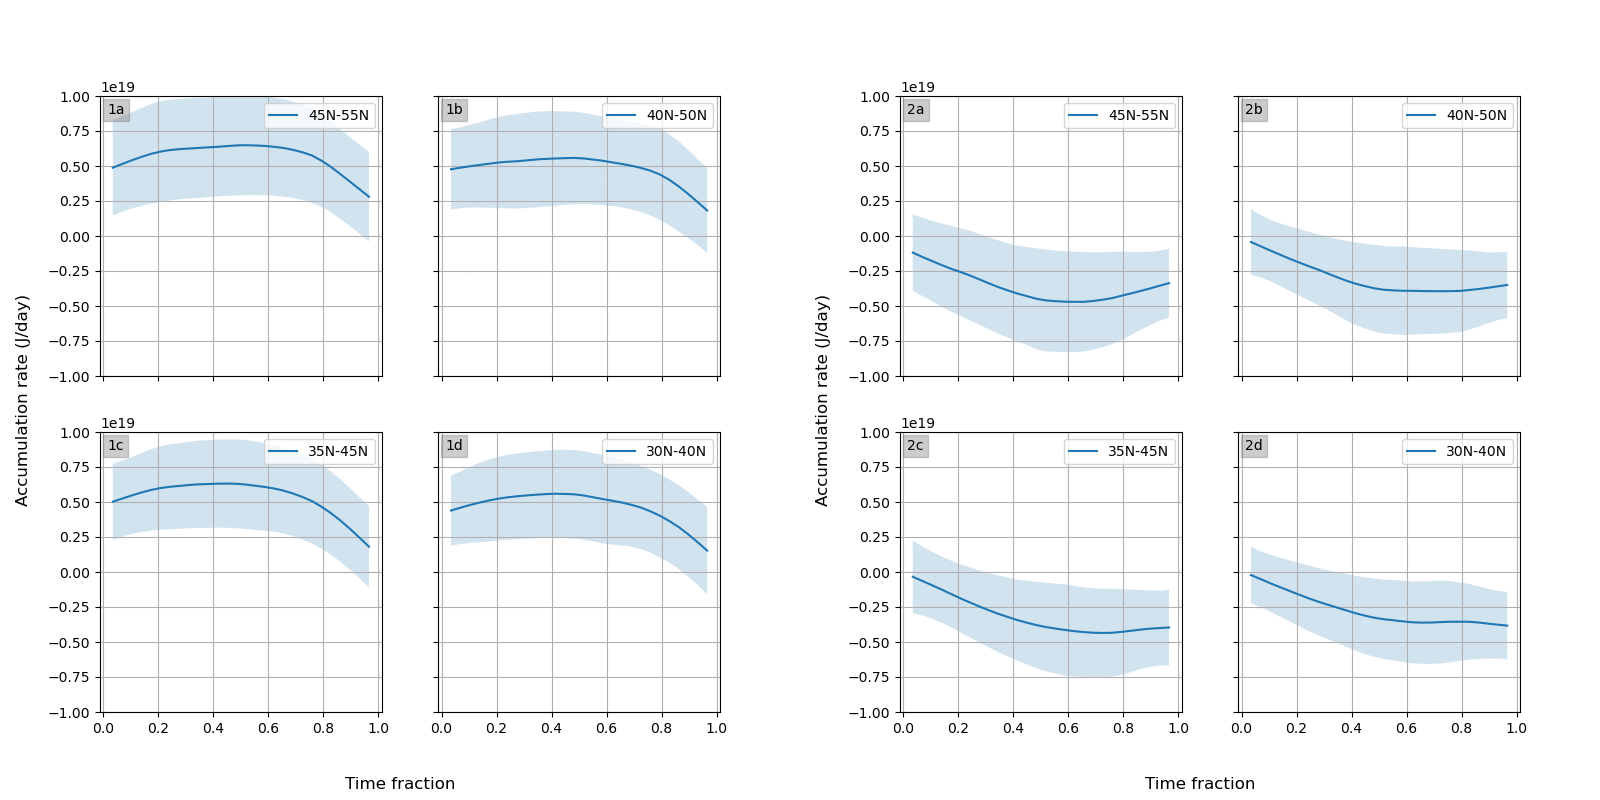

730.0000000000001


/tmp/ipykernel_1392095/725730982.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/725730982.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/725730982.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/725730982.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/725730982.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/725730982.py

In [29]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[0], ax[1][1],'1d')

subfigs[0].supxlabel('Time fraction')
subfigs[0].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')

#######################################################################################
#######################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[1].supxlabel('Time fraction')
subfigs[1].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')



# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7a_int.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


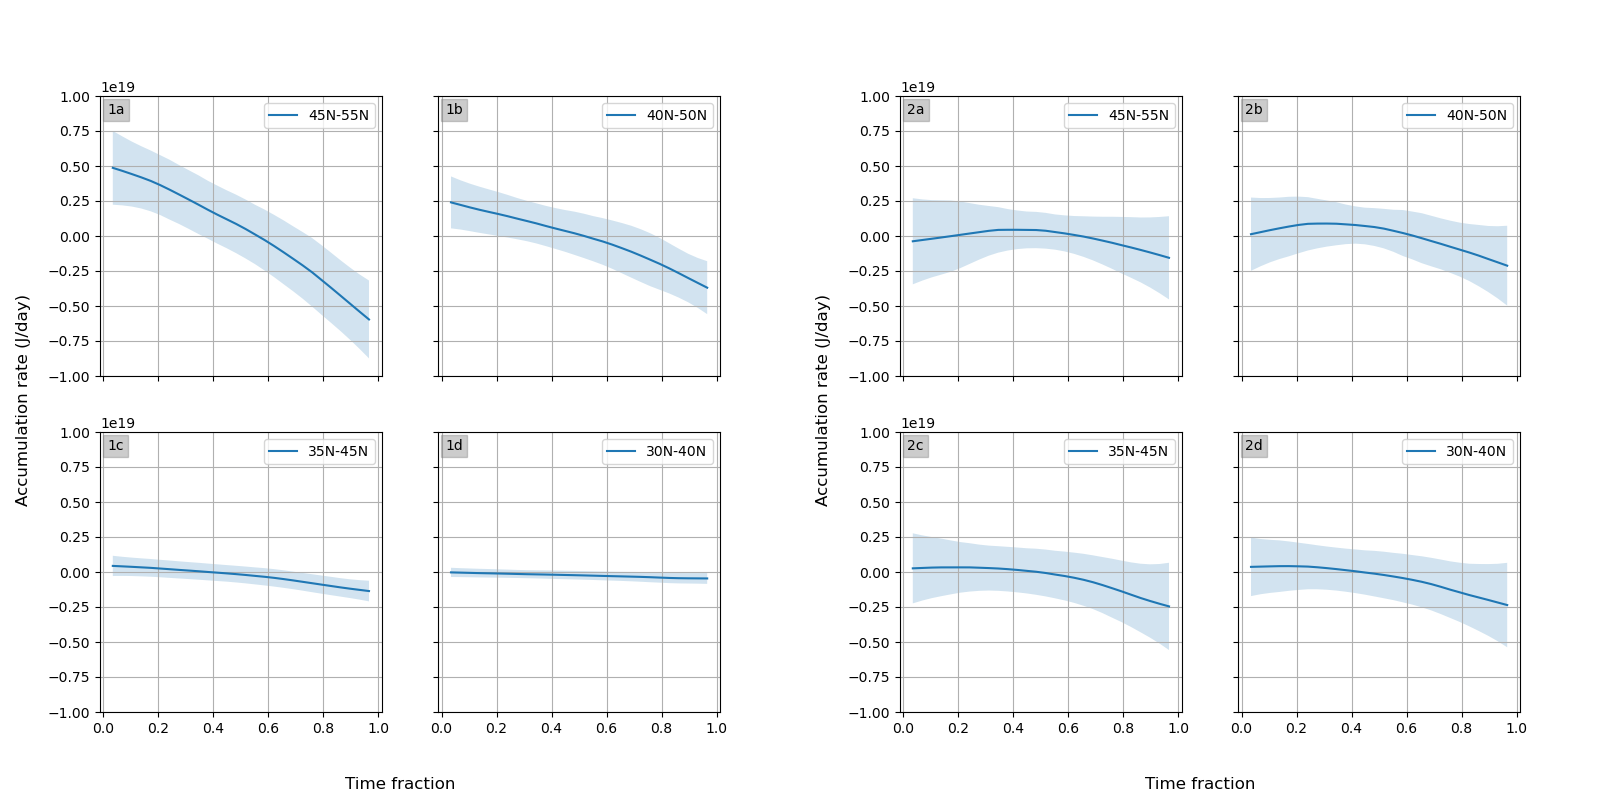

730.0000000000001


/tmp/ipykernel_1392095/1529003020.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1529003020.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1529003020.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1529003020.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1529003020.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1529003

In [30]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[2][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[2][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[2][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[2][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[0], ax[1][1],'1d')

subfigs[0].supxlabel('Time fraction')
subfigs[0].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')

#######################################################################################
#######################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[1][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[1][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[1][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[1][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[1].supxlabel('Time fraction')
subfigs[1].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')



# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7b_int.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


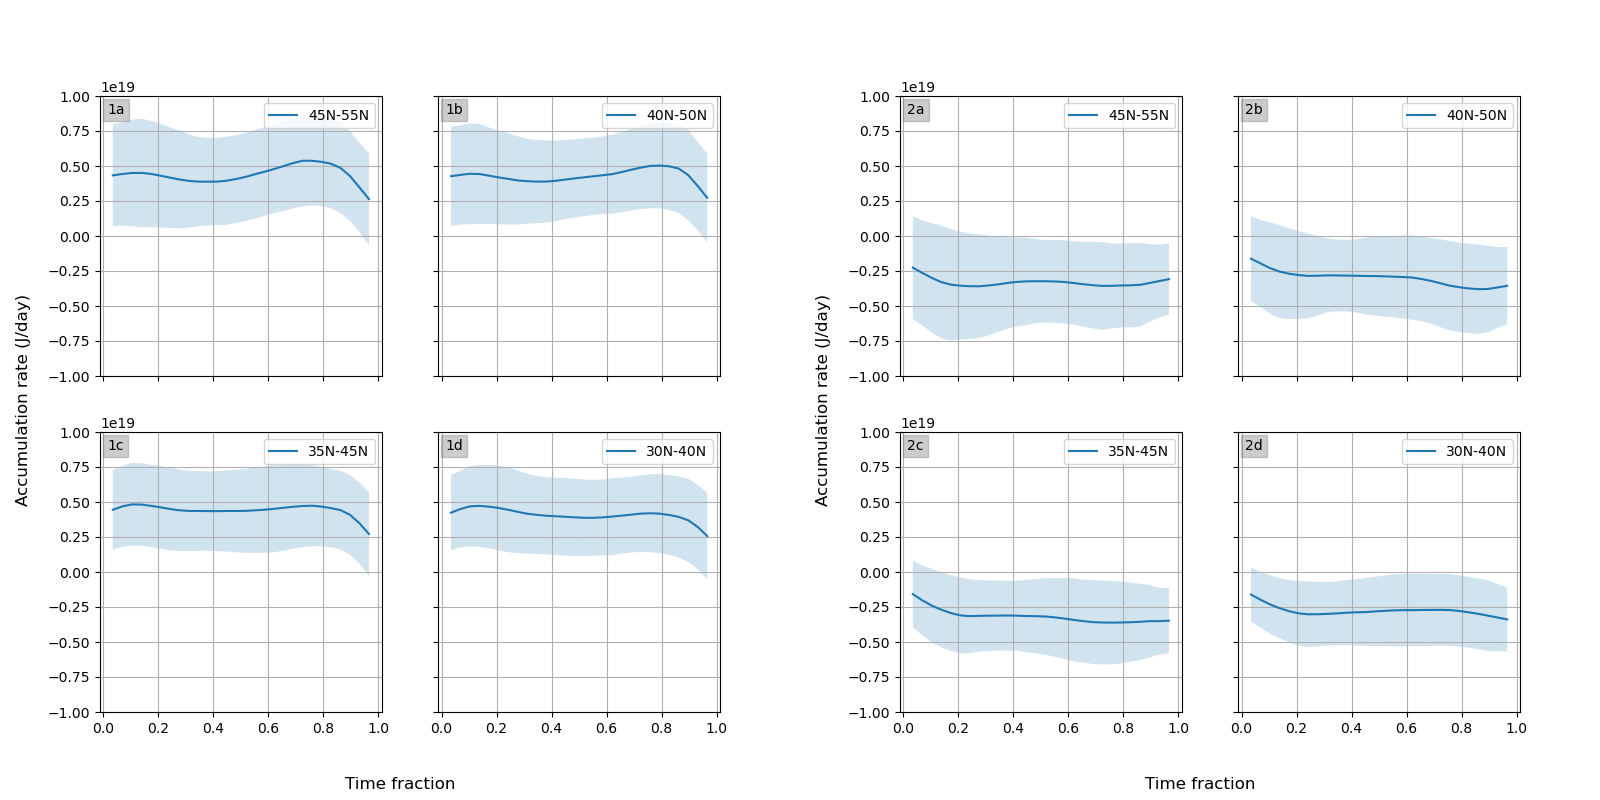

730.0000000000001


/tmp/ipykernel_1392095/1472985533.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1472985533.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1472985533.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1472985533.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1472985533.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1472985

In [31]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[0], ax[1][1],'1d')

subfigs[0].supxlabel('Time fraction')
subfigs[0].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')

#######################################################################################
#######################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[1].supxlabel('Time fraction')
subfigs[1].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')



# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7a_lon.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


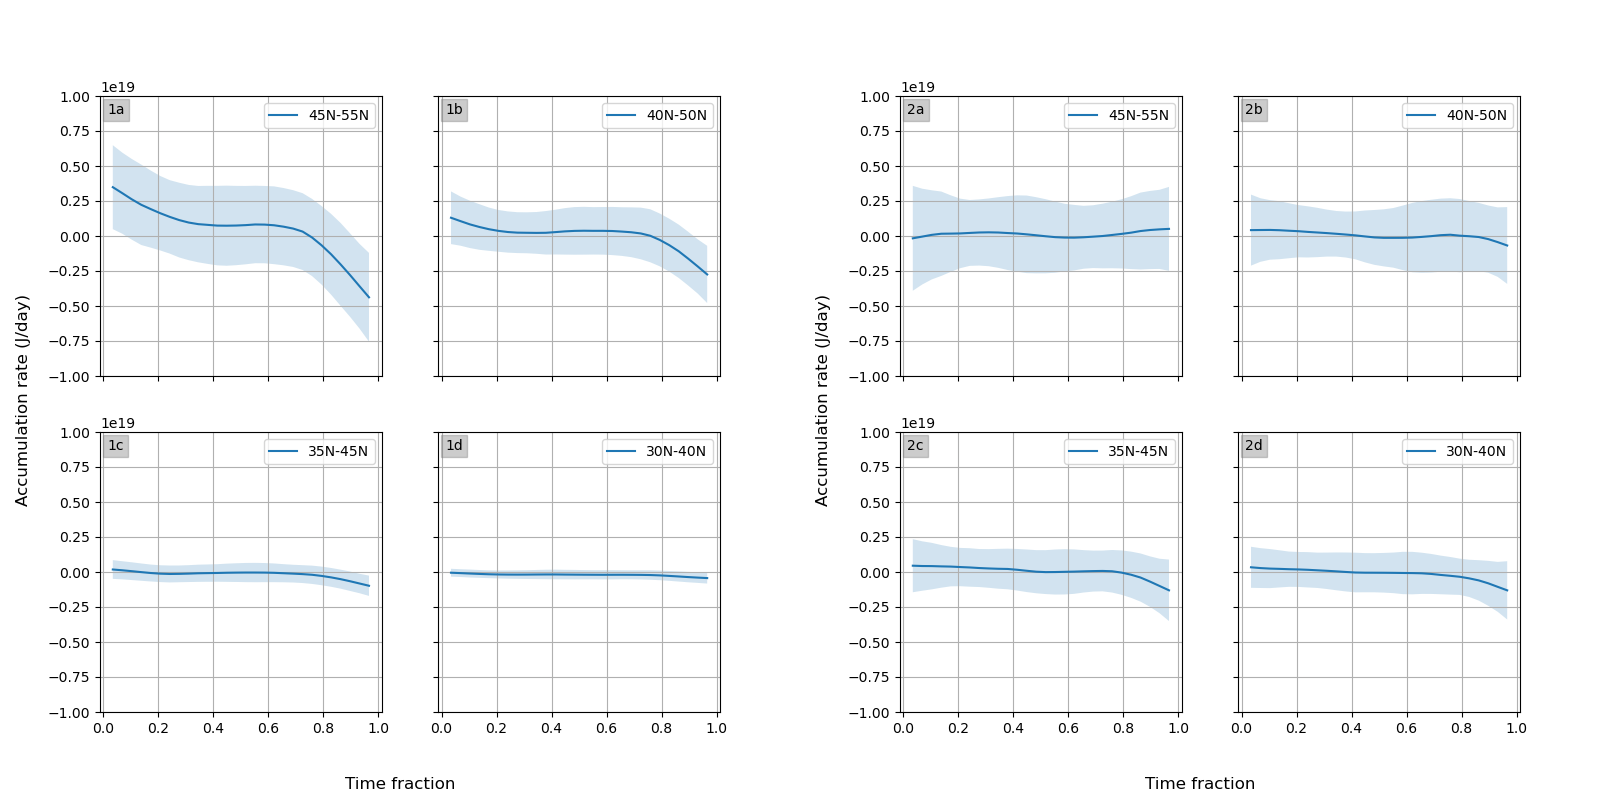

730.0000000000001


/tmp/ipykernel_1392095/1657552012.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1657552012.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1657552012.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1657552012.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1657552012.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
/tmp/ipykernel_1392095/1657552

In [32]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(16, 8))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(2, 2, sharex=True, sharey=True)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[2][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[2][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[2][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[2][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[0], ax[0][0],'1a')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[0], ax[0][1],'1b')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[0], ax[1][0],'1c')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[0], ax[1][1],'1d')

subfigs[0].supxlabel('Time fraction')
subfigs[0].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')

#######################################################################################
#######################################################################################

ax = subfigs[1].subplots(2, 2, sharex=True, sharey=True)

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[1][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[1][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[1][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[1][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, label='45N-55N')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].legend()
set_label(subfigs[1], ax[0][0],'2a')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, label='40N-50N')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].legend()
set_label(subfigs[1], ax[0][1],'2b')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, label='35N-45N')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].legend()
set_label(subfigs[1], ax[1][0],'2c')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, label='30N-40N')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].legend()
set_label(subfigs[1], ax[1][1],'2d')

subfigs[1].supxlabel('Time fraction')
subfigs[1].supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')



# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7b_lon.pdf', bbox_inches='tight')